In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# -------------------------------------------------------MEAN Analysis in case of Outliers---------------------------------------------------
#consider u are planning to keep a car showroom,and here are the names and monthly incomes of people living in that region, so that based on their income take a final call to set or not set showroom in that region
data = {
    'rob': 5000,
    'rafi': 6000,
    'Naina': 4000,
    'Sofia': 7500,
    'Mohan': 8000,
    'Irhaad': 7000
}

# Convert dictionary to DataFrame with names as index and income as column
print("case-1")
df = pd.DataFrame(list(data.items()), columns=['name', 'monthlyincome'])
print(df)
#consider another data with elon musk also living there
data1 = {
    'rob': 5000,
    'rafi': 6000,
    'Naina': 4000,
    'Sofia': 7500,
    'Mohan': 8000,
    'Irhaad': 7000,
    'Elon':100000000000000
}
print("\n Case-2")
# Convert dictionary to DataFrame with names as index and income as column
df1 = pd.DataFrame(list(data1.items()), columns=['name', 'monthlyincome'])
print(df1)

#now seeing statistical analysis which best gives best decision
#for data 
print(f"Mean in case of case1:{df.monthlyincome.mean()}")
#saying 6250 is average income of people in that area, so decision making is easy i.e. not to keep showroom 

#for case 2
print(f"Mean in case of case1:{df1.monthlyincome.mean()}")
#saying avg income is high , so keep showroom , but it is not good decision because of only person(outlier),we cannot keep a showroom for 1 person and its rare case of living elon there
#Overall Conclusion : Mean is sensitive towards outliers.

case-1
     name  monthlyincome
0     rob           5000
1    rafi           6000
2   Naina           4000
3   Sofia           7500
4   Mohan           8000
5  Irhaad           7000

 Case-2
     name    monthlyincome
0     rob             5000
1    rafi             6000
2   Naina             4000
3   Sofia             7500
4   Mohan             8000
5  Irhaad             7000
6    Elon  100000000000000
Mean in case of case1:6250.0
Mean in case of case1:14285714291071.428


In [49]:
#median 
print("\n Case-2")
# Convert dictionary to DataFrame with names as index and income as column
df1 = pd.DataFrame(list(data1.items()), columns=['name', 'monthlyincome'])
print(df1)

#now seeing statistical analysis which best gives best decision
#for data 
print(f"Median in case of case1:{df.monthlyincome.median()}")
#saying 6250 is average income of people in that area, so decision making is easy i.e. not to keep showroom 

#for case 2
print(f"Median in case of case1:{df1.monthlyincome.median()}")
#even with outlier (i.e. even when data is skewed it median works well) for decision making


 Case-2
     name    monthlyincome
0     rob             5000
1    rafi             6000
2   Naina             4000
3   Sofia             7500
4   Mohan             8000
5  Irhaad             7000
6    Elon  100000000000000
Median in case of case1:6500.0
Median in case of case1:7000.0


In [61]:
#----------------------------------------Outlier Detection -----------------------------------------------------------------
#1)Percentile
# Calculate 99th percentile
percentile_99 = df1['monthlyincome'].quantile(0.99)

# Filter outliers above 99th percentile
df_out = df1[df1['monthlyincome'] > percentile_99]

print("99th Percentile Value:", percentile_99)
print("Outliers above 99th percentile:")
print(df_out)
new_df=df1[df1.monthlyincome <percentile_99]
print(f"Data after removal of Outlier using 99Percentile:{new_df}")


99th Percentile Value: 94000000000479.95
Outliers above 99th percentile:
   name    monthlyincome
6  Elon  100000000000000
Data after removal of Outlier using 99Percentile:     name  monthlyincome
0     rob           5000
1    rafi           6000
2   Naina           4000
3   Sofia           7500
4   Mohan           8000
5  Irhaad           7000


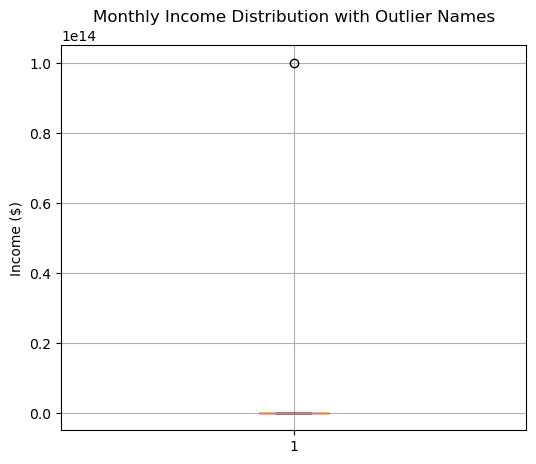

     name    monthlyincome
0     rob             5000
1    rafi             6000
2   Naina             4000
3   Sofia             7500
4   Mohan             8000
5  Irhaad             7000
6    Elon  100000000000000
After outlier removal using IQR method, data is:
     name  monthlyincome
0     rob           5000
1    rafi           6000
2   Naina           4000
3   Sofia           7500
4   Mohan           8000
5  Irhaad           7000


In [105]:
'''2)IQR: Focuses on the middle 50 percent of the data.
IQR = difference between the 75th percentile (Q3) and the 25th percentile (Q1).
Outliers are flagged if they are below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR.
This is the method used in box plots.
Advantage: Does not assume the data follows a normal distribution.
'''
# Create boxplot
# Extract income values
income = df1['monthlyincome']

# Calculate quartiles
q1 = np.percentile(income, 25)
q3 = np.percentile(income, 75)
iqr = q3 - q1

# Define outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df1[(df1['monthlyincome'] < lower_bound) | (df1['monthlyincome'] > upper_bound)]

# Create boxplot
plt.figure(figsize=(6, 5))
plt.boxplot(income, patch_artist=True, boxprops=dict(facecolor='green'))
# Add labels
plt.ylabel('Income ($)')
plt.title('Monthly Income Distribution with Outlier Names')
plt.grid(True)
plt.show()
#elon musk is seen as outlier 
##---Removal outlier----
df_outlier = df1[(df1['monthlyincome'] > lower_bound) | (df1['monthlyincome'] < upper_bound)]
print(df_outlier)
#removal
df_iqr = df1[(df1['monthlyincome'] > lower_bound) & (df1['monthlyincome'] < upper_bound)]
print(f"After outlier removal using IQR method, data is:\n{df_iqr}")

Cleaned DataFrame (Z-score ≤ ±2):
      Student  Score
0    Student1     88
1    Student2     92
2    Student3     75
3    Student4     85
4    Student5     90
5    Student6     95
6    Student7     78
7    Student8     84
8    Student9     91
9   Student10     87
10  Student11     89
11  Student12     93
12  Student13     76
13  Student14     82
14  Student15     88
15  Student16     94
16  Student17     79
17  Student18     81


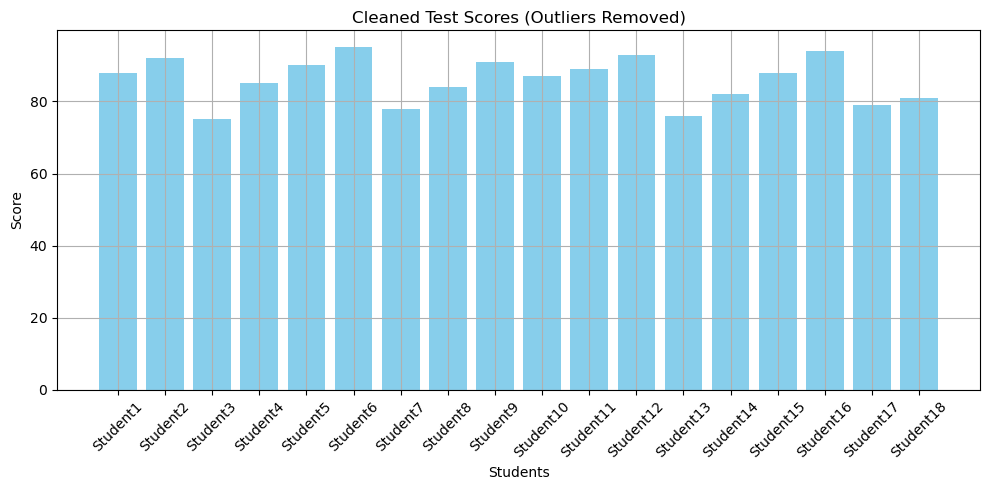

In [121]:

'''Z score or SD: The data which is normally distributed and has outliers can be removed using Z score which states data pts -2*SD<x<2*SD
 or -3*SD<x<3*SD treated as data without outliers
 Works best when the data follows a bell-shaped (normal) curve.

The Z-score tells us how many standard deviations a point is from the mean.

Rule of thumb: if the score is more than 3 standard deviations away, it’s likely an outlier.'''
# Sample scores with outliers
scores = {
    'Student': [f'Student{i+1}' for i in range(20)],
    'Score': [88, 92, 75, 85, 90, 95, 78, 84, 91, 87, 89, 93, 76, 82, 88, 94, 79, 81, 130, 145]
}

# Create DataFrame
df = pd.DataFrame(scores)

# Z-score calculation
mean = df['Score'].mean()
std = df['Score'].std()
df['Z_score'] = (df['Score'] - mean) / std

# Remove outliers (Z > ±2)
threshold = 2
cleaned_df = df[np.abs(df['Z_score']) <= threshold]

# Print cleaned DataFrame
print("Cleaned DataFrame (Z-score ≤ ±2):")
print(cleaned_df[['Student', 'Score']])

# Simple bar plot of cleaned scores
plt.figure(figsize=(10, 5))
plt.bar(cleaned_df['Student'], cleaned_df['Score'], color='skyblue')
plt.title('Cleaned Test Scores (Outliers Removed)')
plt.xlabel('Students')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [141]:
'''
Modified Z scor or MAD:Median absolute Deviation
The regular Z-score can itself be affected by outliers, so we use a more robust method:

Use the median instead of the mean (since it isn’t dragged by extremes).

Use MAD instead of standard deviation (less sensitive to outliers).

Rule of thumb: if the modified Z-score is greater than 3.5, it’s an outlier.
'''
# Skewed scores with outliers
scores_mad = {
    'Student': [f'Student{i+1}' for i in range(20)],
    'Score': [88, 92, 75, 85, 90, 95, 78, 84, 91, 87, 89, 93, 76, 82, 88, 94, 79, 81, 130, 145]
}

df_mad = pd.DataFrame(scores_mad)

# Calculate median and MAD
median = df_mad['Score'].median()
mad = np.median(np.abs(df_mad['Score'] - median)) 

# Define threshold (commonly 3 × MAD)
threshold = 3 * mad
df_mad['MAD_score'] = np.abs(df_mad['Score'] - median)

# Remove outliers
cleaned_mad = df_mad[df_mad['MAD_score'] <= threshold]

# Print cleaned DataFrame
print(" Cleaned DataFrame using MAD:")
print(cleaned_mad[['Student', 'Score']])

 Cleaned DataFrame using MAD:
      Student  Score
0    Student1     88
1    Student2     92
2    Student3     75
3    Student4     85
4    Student5     90
5    Student6     95
6    Student7     78
7    Student8     84
8    Student9     91
9   Student10     87
10  Student11     89
11  Student12     93
12  Student13     76
13  Student14     82
14  Student15     88
15  Student16     94
16  Student17     79
17  Student18     81


FData:      Person  Income
0    Person1   25000
1    Person2   28000
2    Person3   30000
3    Person4   32000
4    Person5   35000
5    Person6   37000
6    Person7   40000
7    Person8   42000
8    Person9   45000
9   Person10   47000
10  Person11   50000
11  Person12   52000
12  Person13   55000
13  Person14   58000
14  Person15   60000
15  Person16   62000
16  Person17   65000
17  Person18   70000
18  Person19   75000
19  Person20   80000
20  Person21  150000
21  Person22  180000
22  Person23  200000
23  Person24  220000
24  Person25  250000
✅ Cleaned Monthly Income Data (Z-score on log scale):
      Person  Income
0    Person1   25000
1    Person2   28000
2    Person3   30000
3    Person4   32000
4    Person5   35000
5    Person6   37000
6    Person7   40000
7    Person8   42000
8    Person9   45000
9   Person10   47000
10  Person11   50000
11  Person12   52000
12  Person13   55000
13  Person14   58000
14  Person15   60000
15  Person16   62000
16  Person17   65000
17  Person18   7

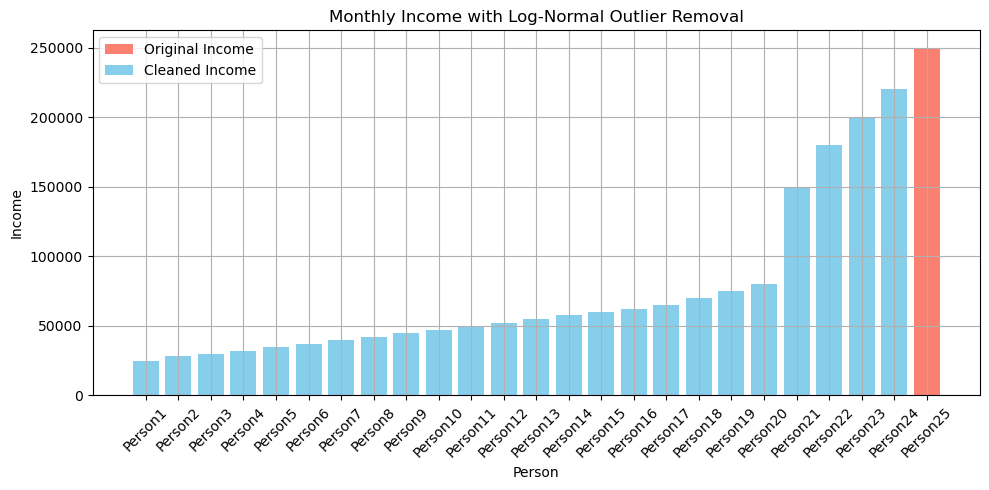

In [139]:
'''
Log normal : Data is skewed intially when applied log it transformed into normal distribution , such data is called Log normal ,
outlier removal is like z scored or normal distribution only +/- 2 or 3

'''
# Realistic monthly income data (log-normal shaped)
income_data = {
    'Person': [f'Person{i+1}' for i in range(25)],
    'Income': [25000, 28000, 30000, 32000, 35000, 37000, 40000, 42000, 45000, 47000,
               50000, 52000, 55000, 58000, 60000, 62000, 65000, 70000, 75000, 80000,
               150000, 180000, 200000, 220000, 250000]  # High outliers
}

df_income = pd.DataFrame(income_data)
print(f"FData:{df_income}")
# Log-transform the income
df_income['Log_Income'] = np.log(df_income['Income'])

# Z-score on log-transformed data
mean_log = df_income['Log_Income'].mean()
std_log = df_income['Log_Income'].std()
df_income['Z_score'] = (df_income['Log_Income'] - mean_log) / std_log

# Remove outliers (Z > ±2)
cleaned_income = df_income[np.abs(df_income['Z_score']) <= 2]

# Print cleaned DataFrame
print("✅ Cleaned Monthly Income Data (Z-score on log scale):")
print(cleaned_income[['Person', 'Income']])

# Plot original vs cleaned
plt.figure(figsize=(10, 5))
plt.bar(df_income['Person'], df_income['Income'], color='salmon', label='Original Income')
plt.bar(cleaned_income['Person'], cleaned_income['Income'], color='skyblue', label='Cleaned Income')
plt.title('Monthly Income with Log-Normal Outlier Removal')
plt.xlabel('Person')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()